In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('vehicles.csv')

In [5]:
data.model = pd.factorize(data.model)[0]

In [6]:
data.model.value_counts()

5      23
24     16
32      9
45      8
111     8
       ..
235     1
236     1
237     1
238     1
177     1
Name: model, Length: 355, dtype: int64

In [7]:
data.make = pd.factorize(data.make)[0]

In [8]:
data.corr()

,id,price,year,make,model,odometer,make_median_price,model_median_price,age,distance_per_year
id,1.000000,-0.111799,0.003933,0.024086,-0.072459,0.015798,-0.002933,-0.009009,-0.003933,0.008848
price,-0.111799,1.000000,-0.164806,-0.081203,-0.016753,-0.007065,0.054586,0.499229,0.164806,-0.047045
year,0.003933,-0.164806,1.000000,0.279895,0.117893,-0.049294,-0.029867,-0.081385,-1.000000,0.214833
make,0.024086,-0.081203,0.279895,1.000000,0.263251,-0.008266,-0.315895,-0.051042,-0.279895,0.067425
model,-0.072459,-0.016753,0.117893,0.263251,1.000000,-0.058627,-0.109105,-0.122928,-0.117893,-0.024545
odometer,0.015798,-0.007065,-0.049294,-0.008266,-0.058627,1.000000,-0.031478,-0.024002,0.049294,0.828084
make_median_price,-0.002933,0.054586,-0.029867,-0.315895,-0.109105,-0.031478,1.000000,0.209324,0.029867,-0.059442
model_median_price,-0.009009,0.499229,-0.081385,-0.051042,-0.122928,-0.024002,0.209324,1.000000,0.081385,-0.033009
age,-0.003933,0.164806,-1.000000,-0.279895,-0.117893,0.049294,0.029867,0.081385,1.000000,-0.214833
distance_per_year,0.008848,-0.047045,0.214833,0.067425,-0.024545,0.828084,-0.059442,-0.033009,-0.214833,1.000000


In [4]:
data.price.describe()

count    379841.00000
mean      13101.17849
std        8775.38383
min        1001.00000
25%        5995.00000
50%       10995.00000
75%       17995.00000
max       39999.00000
Name: price, dtype: float64

In [5]:
'''
This function plots numerical distributions for variables in the dataset referred to by the data variable

data - dataset that contains variable, dataframe type 
variable - variable (column) you want to plot, string 
title - title of the graph, string
'''

# data is the dataset you want to use that contains the variable
# variable 
def plot_numerical_variables_distribution(data, variable, title):
    
    ax = sns.distplot(data[variable])
    ax.set_title(title)
    ax.set_xlabel(variable)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.savefig(title)

In [6]:
def numerical_variables_boxplot(data, variable, title):
    
    ax = sns.boxplot(x=data[variable])
    ax.set_title(title)
    ax.set_xlabel(variable)
    #plt.figure(figsize=(20,10))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.savefig(title)

In [7]:
def plot_cat_var(labels, sizes, title, num_values):
    
    #distribution_size = data[column].shape[0]
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
        
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    #plt.figure(figsize=(20,10))
    plt.savefig(title)

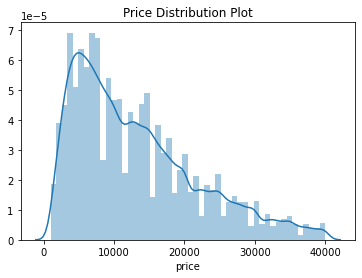

In [8]:
plot_numerical_variables_distribution(data, 'price', 'Price Distribution Plot')

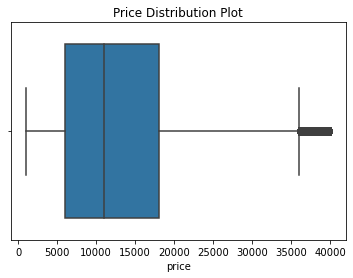

In [9]:
numerical_variables_boxplot(data, 'price', 'Price Distribution Plot')

In [10]:
data.price.describe()

count    379841.00000
mean      13101.17849
std        8775.38383
min        1001.00000
25%        5995.00000
50%       10995.00000
75%       17995.00000
max       39999.00000
Name: price, dtype: float64

The max value of the price is 40000 according to boxplot mathematics, anything above that is an outlier

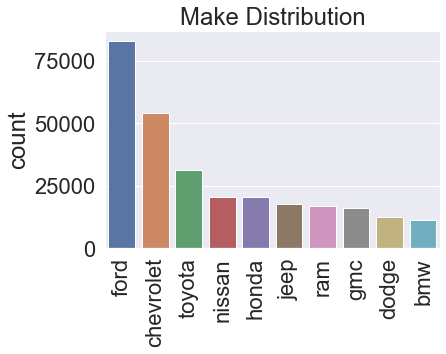

In [11]:
plot_cat_var(data.make.value_counts().index, data.make.value_counts()[:10], 'Make Distribution', num_values=len(data.make.value_counts().index))

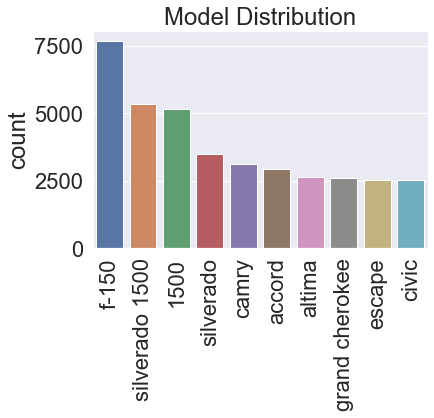

In [12]:
plot_cat_var(data.model.value_counts().index[:10], data.model.value_counts()[:10], 'Model Distribution', num_values=len(data.model.value_counts().index))

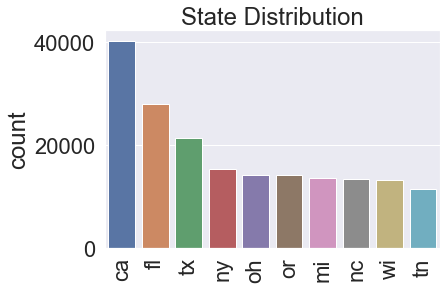

In [13]:
plot_cat_var(data.state.value_counts().index[:10], data.state.value_counts()[:10], 'State Distribution', num_values=len(data.state.value_counts().index))

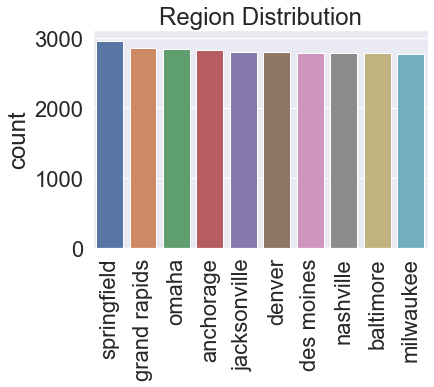

In [14]:
plot_cat_var(data.region.value_counts().index[:10], data.region.value_counts()[:10], 'Region Distribution', num_values=len(data.region.value_counts().index))

In [15]:
len(data.type.value_counts().index)

13

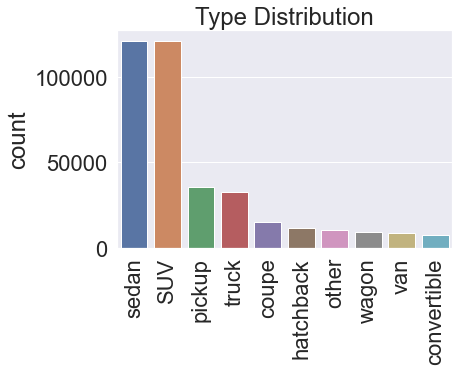

In [16]:
plot_cat_var(data.type.value_counts().index, data.type.value_counts(), 'Type Distribution', num_values=len(data.type.value_counts().index))

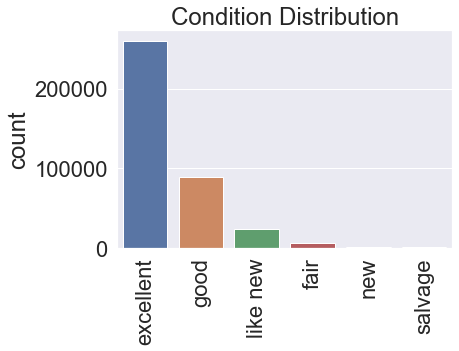

In [17]:
plot_cat_var(data.condition.value_counts().index, data.condition.value_counts(), 'Condition Distribution', num_values=len(data.condition.value_counts().index))

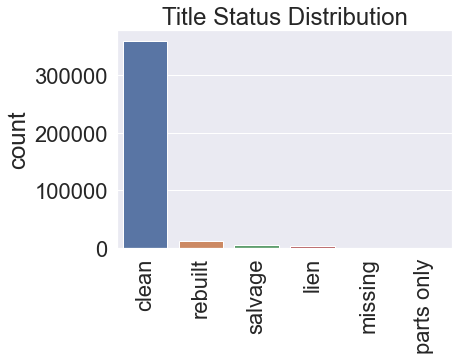

In [18]:
plot_cat_var(data.title_status.value_counts().index, data.title_status.value_counts(), 'Title Status Distribution', num_values=len(data.title_status.value_counts().index))

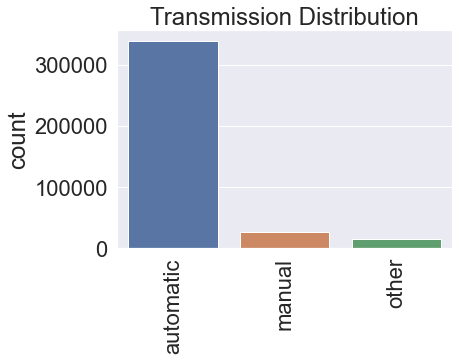

In [19]:
plot_cat_var(data.transmission.value_counts().index, data.transmission.value_counts(), 'Transmission Distribution', num_values=len(data.transmission.value_counts().index))

In [20]:
indices = len(data['size'].value_counts().index)

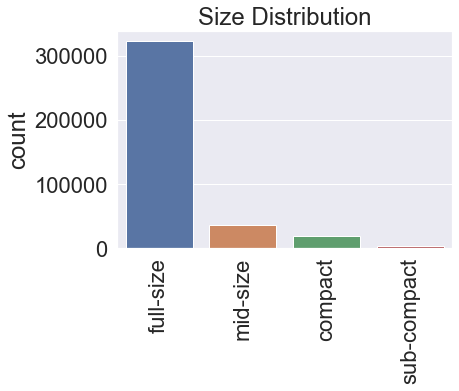

In [21]:
plot_cat_var(data['size'].value_counts().index, data['size'].value_counts(), 'Size Distribution', num_values=indices)

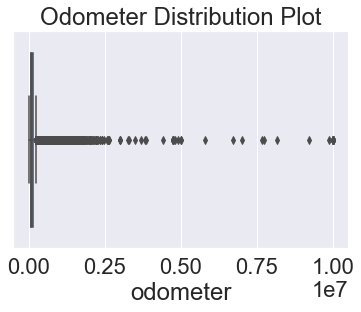

In [22]:
numerical_variables_boxplot(data, 'odometer', 'Odometer Distribution Plot')

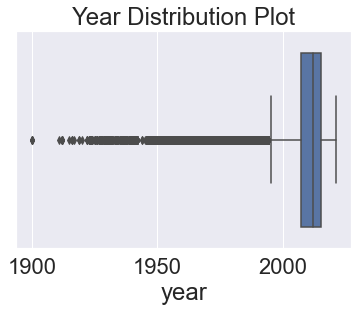

In [23]:
numerical_variables_boxplot(data, 'year', 'Year Distribution Plot')

In [24]:
data.year.describe()

count    379841.000000
mean       2009.594615
std           9.130873
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

Outliers are before the year 1993

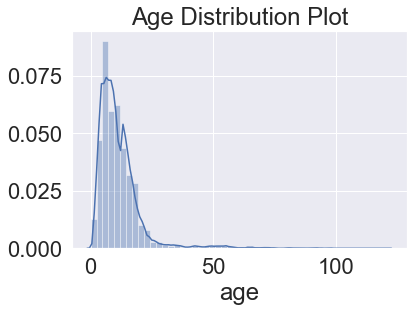

In [25]:
plot_numerical_variables_distribution(data, 'age', 'Age Distribution Plot')

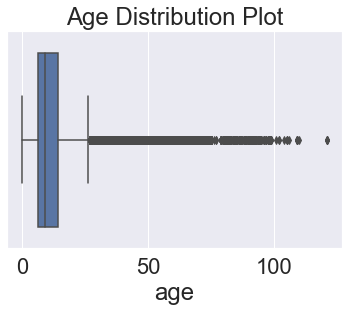

In [26]:
numerical_variables_boxplot(data, 'age', 'Age Distribution Plot')

In [58]:
data.age.describe()

count    379841.000000
mean         11.405385
std           9.130873
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         121.000000
Name: age, dtype: float64

Outliers begin at 26 years and older

In [33]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'make', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'description',
       'state'],
      dtype='object')

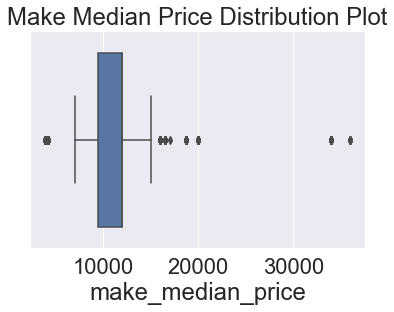

In [27]:
numerical_variables_boxplot(data, 'make_median_price', 'Make Median Price Distribution Plot')

In [62]:
data.make_median_price.describe()

count    379841.00000
mean      11307.37175
std        2815.01476
min        3900.00000
25%        9495.00000
50%       11999.00000
75%       12000.00000
max       35900.00000
Name: make_median_price, dtype: float64

In [28]:
q1 = np.percentile(data.make_median_price, 25)
q3 = np.percentile(data.make_median_price, 75)
iqr = q3 - q1

In [29]:
q3 + 1.5*iqr

15757.5

The outlier median price is 15757.5

In [67]:
data[data.make_median_price > 15757.5]['make'].value_counts().index

Index(['ram', 'rover', 'tesla', 'alfa-romeo', 'porche', 'aston-martin',
       'morgan'],
      dtype='object')

 The following are the makes of the outliers 'ram', 'rover', 'tesla', 'ferrari', 'aston-martin', 'porche', 'morgan'

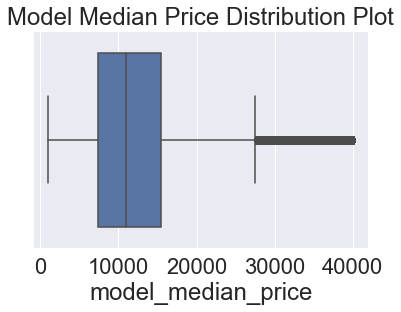

In [30]:
numerical_variables_boxplot(data, 'model_median_price', 'Model Median Price Distribution Plot')

In [31]:
data.model_median_price.describe()

count    379841.000000
mean      12337.387388
std        6658.972842
min        1050.000000
25%        7400.000000
50%       10995.000000
75%       15474.500000
max       39999.000000
Name: model_median_price, dtype: float64

The outliers have a model median price of $23190

In [70]:
price_corr = data.corr()['price']

In [71]:
price_corr

id                   -0.063512
price                 1.000000
year                  0.330990
odometer             -0.234477
make_median_price     0.297773
model_median_price    0.709458
age                  -0.330990
distance_per_year     0.058029
Name: price, dtype: float64

In [73]:
data.corr()['make_median_price']

id                   -0.035465
price                 0.297773
year                  0.011164
odometer              0.018788
make_median_price     1.000000
model_median_price    0.403012
age                  -0.011164
distance_per_year     0.044910
Name: make_median_price, dtype: float64

[Text(0, 0, 'excellent'),
 Text(0, 0, 'good'),
 Text(0, 0, 'like new'),
 Text(0, 0, 'fair'),
 Text(0, 0, 'new'),
 Text(0, 0, 'salvage')]

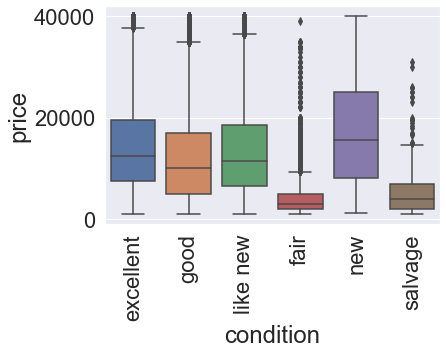

In [80]:
ax = sns.boxplot(y='price', x='condition', data=data)
ax.set_xticklabels(labels=data.condition.value_counts().index, rotation=90)

Prices are pretty similar across all the conditions not too much variance, until you get to salvage, which still doesnt change THAT much

[Text(0, 0, 'clean'),
 Text(0, 0, 'rebuilt'),
 Text(0, 0, 'salvage'),
 Text(0, 0, 'lien'),
 Text(0, 0, 'missing'),
 Text(0, 0, 'parts only')]

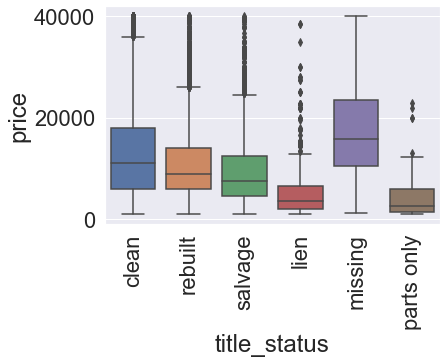

In [82]:
ax = sns.boxplot(y='price', x='title_status', data=data)
ax.set_xticklabels(labels=data.title_status.value_counts().index, rotation=90)

Why are missing title statuses being prices so highly, was there something wrong with the data 
cleaning? No this is just strange, but interesting to examine on another run through

In [32]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'make', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'description',
       'state', 'make_median_price', 'model_median_price', 'age',
       'distance_per_year'],
      dtype='object')

[Text(0, 0, 'sedan'),
 Text(0, 0, 'SUV'),
 Text(0, 0, 'pickup'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'coupe'),
 Text(0, 0, 'hatchback'),
 Text(0, 0, 'other'),
 Text(0, 0, 'wagon'),
 Text(0, 0, 'van'),
 Text(0, 0, 'convertible'),
 Text(0, 0, 'mini-van'),
 Text(0, 0, 'offroad'),
 Text(0, 0, 'bus')]

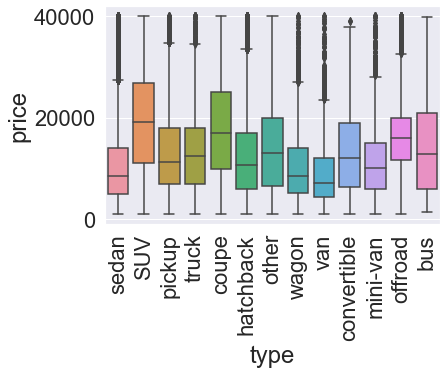

In [37]:
ax = sns.boxplot(y='price', x='type', data=data)
ax.set_xticklabels(labels=data.type.value_counts().index, rotation=90)

Sedan's tend to be on the cheaper end, pickup truck, overall it seems that SUV is the most expensive, and it does matter a bit which vehicle to choose.

Try looking at the median and mean price of type, and see what happens

[Text(0, 0, 'full-size'),
 Text(0, 0, 'mid-size'),
 Text(0, 0, 'compact'),
 Text(0, 0, 'sub-compact')]

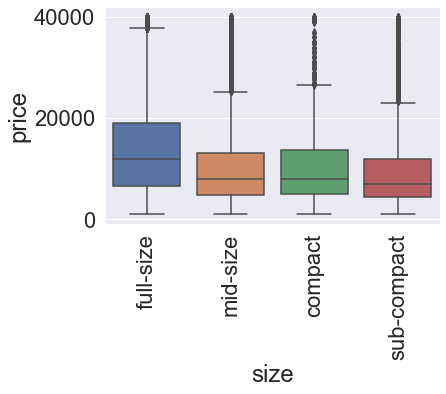

In [40]:
ax = sns.boxplot(y='price', x='size', data=data)
ax.set_xticklabels(labels=data['size'].value_counts().index, rotation=90)

changes a bit for full-size, create variable called is_full_size

In [41]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'make', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'description',
       'state', 'make_median_price', 'model_median_price', 'age',
       'distance_per_year'],
      dtype='object')

[Text(0, 0, 'black'),
 Text(0, 0, 'white'),
 Text(0, 0, 'silver'),
 Text(0, 0, 'grey'),
 Text(0, 0, 'blue'),
 Text(0, 0, 'red'),
 Text(0, 0, 'green'),
 Text(0, 0, 'custom'),
 Text(0, 0, 'brown'),
 Text(0, 0, 'yellow'),
 Text(0, 0, 'orange'),
 Text(0, 0, 'purple')]

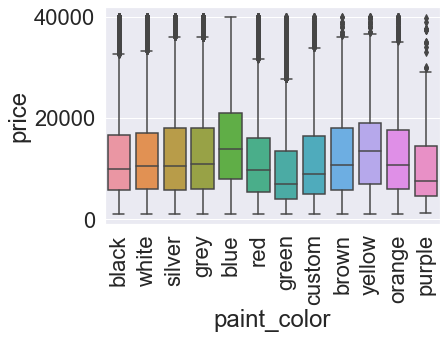

In [43]:
ax = sns.boxplot(y='price', x='paint_color', data=data)
ax.set_xticklabels(labels=data['paint_color'].value_counts().index, rotation=90)

Kind of changes a little bit, but it would be really nice to create, mean, median features for these things, then compare the variance

[Text(0, 0, 'clean'),
 Text(0, 0, 'rebuilt'),
 Text(0, 0, 'salvage'),
 Text(0, 0, 'lien'),
 Text(0, 0, 'missing'),
 Text(0, 0, 'parts only')]

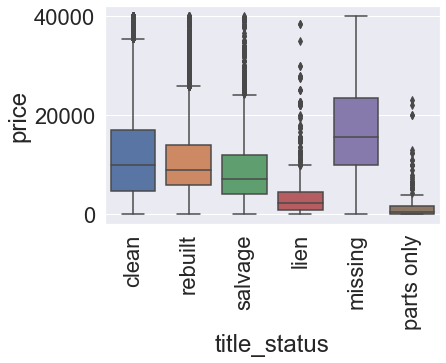

In [87]:
ax = sns.boxplot(y='price', x='title_status', data=o)
ax.set_xticklabels(labels=o.title_status.value_counts().index, rotation=90)

In [4]:
title_status_missing = data[data.title_status == 'missing']

In [45]:
title_status_missing.shape[0]

520

In [47]:
title_status_missing.price.describe()

count      520.000000
mean      5694.496154
std       6025.939771
min       1100.000000
25%       2000.000000
50%       3500.000000
75%       6500.000000
max      38500.000000
Name: price, dtype: float64

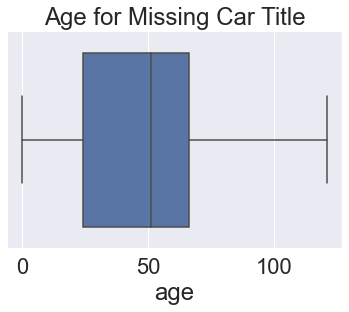

In [48]:
numerical_variables_boxplot(title_status_missing, 'age', 'Age for Missing Car Title')

In [49]:
title_status_missing.age.describe()

count    520.000000
mean      47.676923
std       24.840987
min        0.000000
25%       24.000000
50%       51.000000
75%       66.250000
max      121.000000
Name: age, dtype: float64

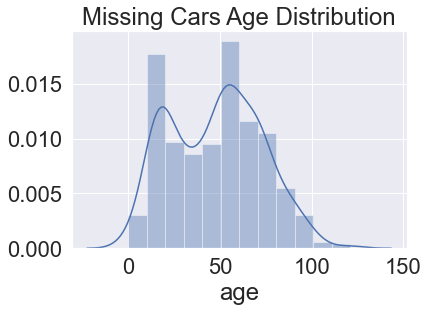

In [50]:
plot_numerical_variables_distribution(title_status_missing, 'age', 'Missing Cars Age Distribution')

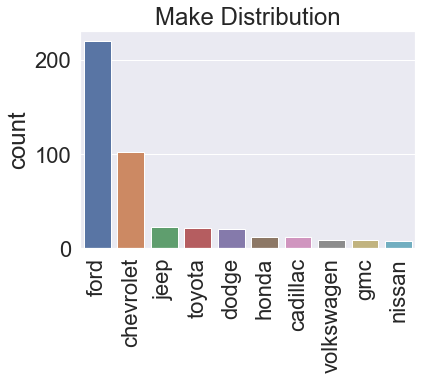

In [51]:
plot_cat_var(title_status_missing.make.value_counts().index, title_status_missing.make.value_counts()[:10], 'Make Distribution', num_values=len(title_status_missing.make.value_counts().index))

In [52]:
title_status_missing[title_status_missing.price > 2000].shape[0]

388

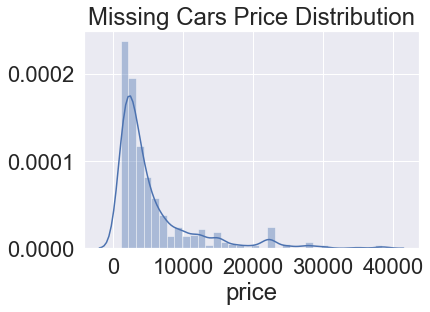

In [53]:
plot_numerical_variables_distribution(title_status_missing, 'price', 'Missing Cars Price Distribution')

In [55]:
title_status_missing.shape[0]

520

In [56]:
title_status_missing.corr()['price']['age']

0.1648059125636527

In [57]:
data.corr()['price']['age']

-0.3309902290841243

In [5]:
title_status_missing.to_csv('missing.csv', index=False)

In [6]:
data = data[data.title_status == 'missing']

In [7]:
data.to_csv('vehicles.csv', index=False)